In [19]:
import pandas as pd
import shifterator as sh
labMTdata = pd.read_csv('labMT.csv')
labmt_scores = labMTdata.set_index('Word')['Happiness Score'].to_dict()


/opt/anaconda3/envs/myenv/lib/python3.8/site-packages/shifterator/plotting.py:604: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(x_ticks, fontsize=plot_params["xtick_fontsize"])


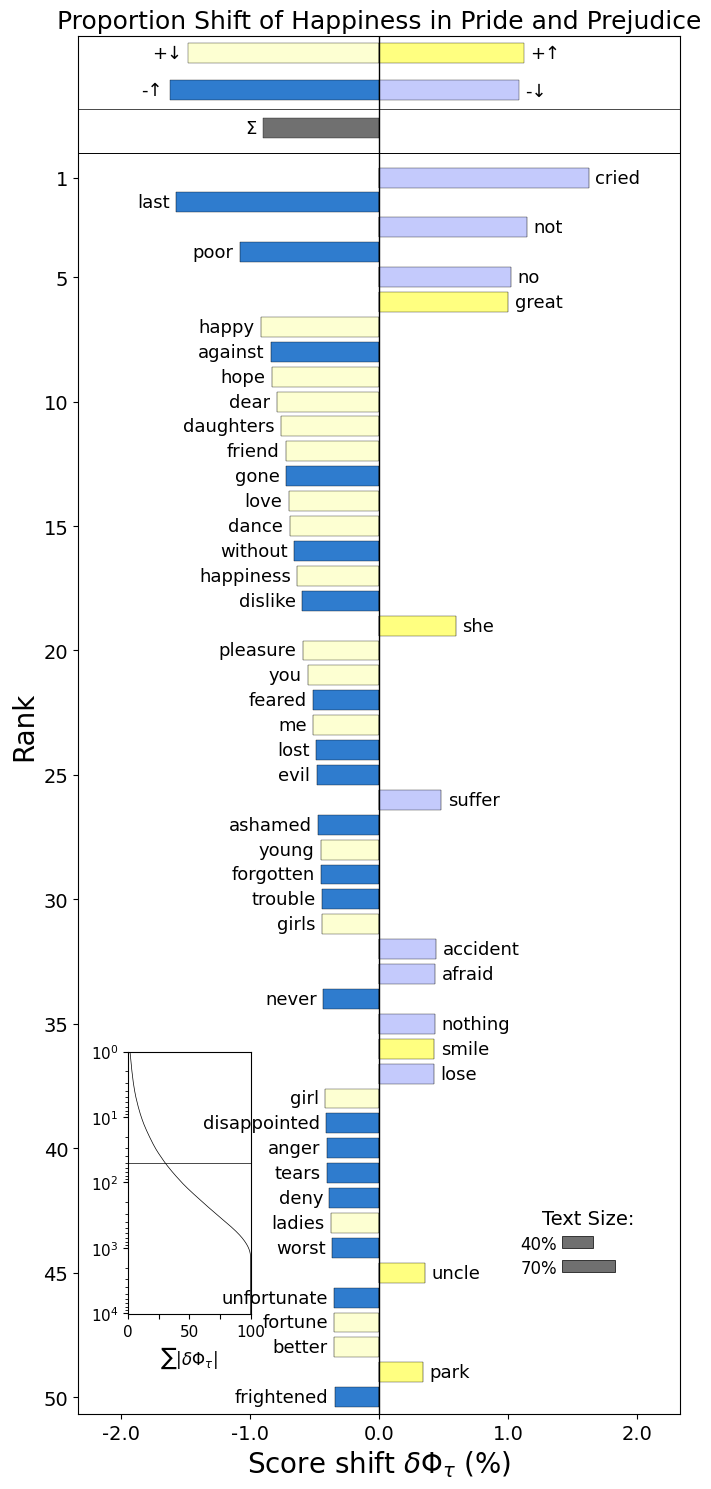

<Axes: title={'center': 'Proportion Shift of Happiness in Pride and Prejudice'}, xlabel='Score shift $\\delta \\Phi_{\\tau}$ (%)', ylabel='Rank'>

In [20]:
ref_df = pd.read_csv('ref.csv')
comp_df = pd.read_csv('comp.csv')


ref_dict = ref_df.set_index('word')['frequency'].to_dict()
comp_dict = comp_df.set_index('word')['frequency'].to_dict()

proportion_shift = sh.Shift(
    type2freq_1=ref_dict,
    type2freq_2=comp_dict,
    type2score_1=labmt_scores,
    handle_missing_scores='exclude',
    reference_value='average'  # Change from 5.7 to 'average'
)

proportion_shift.get_shift_graph(system_names = ['40%', '70%'],
                                 title='Proportion Shift of Happiness in Pride and Prejudice',
                                 filename='proportion_shift_pride_prejudice.png')